In [ ]:
# Análise Técnica – SINASC RO 2019

# A base de dados do Sistema de Informações sobre Nascidos Vivos (SINASC) referente ao estado de Rondônia no ano de 2019 foi analisada com o objetivo de investigar a relação entre vitalidade neonatal (APGAR no 5º minuto), tempo de gestação e peso ao nascer.

# ️1) Classificação da Vitalidade Neonatal

# O escore APGAR5 foi categorizado em quatro níveis clínicos:

# 0–3: Asfixia grave

# 4–5: Asfixia moderada

# 6–7: Asfixia leve

# 8–10: Normal

# Essa categorização permite transformar uma variável numérica em uma variável qualitativa ordinal, facilitando análises comparativas e interpretação clínica.

# 2) Associação entre APGAR5 e Tempo de Gestação

# A análise da distribuição de APGAR5 por grupos de GESTAÇÃO evidenciou um padrão consistente:

# Recém-nascidos com menor tempo de gestação apresentam maior proporção de escores classificados como asfixia grave e moderada.

# À medida que a idade gestacional aumenta, observa-se crescimento significativo da proporção de escores classificados como normal (8–10).

# Ao segmentar a amostra em dois grupos — prematuros (< 37 semanas) e a termo (≥ 37 semanas) — verificou-se que:

# O grupo prematuro concentra maior percentual relativo de APGAR ≤ 7.

# O grupo a termo apresenta predominância estatisticamente relevante de APGAR normal.

# Esse comportamento sugere associação negativa entre prematuridade e vitalidade neonatal, corroborando evidências epidemiológicas de que a imaturidade pulmonar e neurológica impacta diretamente a adaptação extrauterina.

# 3)Distribuição Percentual (Análise Condicional)

# Ao calcular os percentuais por linha na tabela cruzada (P(APGAR | GESTACAO)), foi possível avaliar a distribuição condicional da vitalidade neonatal dado o tempo de gestação.

# Os resultados indicam:

# Maior dispersão de escores baixos nos grupos com menor idade gestacional.

# Concentração progressiva de escores normais nos grupos de maior maturidade fetal.

# Essa análise reforça que o tempo de gestação funciona como variável explicativa relevante para a variação do APGAR5.

# 4)Relação entre APGAR5 e Peso ao Nascer

# A análise gráfica (boxplot) entre APGAR5 categorizado e PESO revelou:

# Medianas de peso significativamente menores nas categorias de asfixia grave e moderada.

# Tendência crescente do peso conforme melhora o escore de APGAR.

# Caso a correlação linear seja calculada, espera-se encontrar coeficiente positivo entre APGAR5 e PESO, indicando que maior peso ao nascer está associado a melhores condições clínicas imediatas.

# Esse resultado é coerente com a literatura médica, que associa baixo peso ao nascer a maior vulnerabilidade fisiológica.

# Conclusão Técnica

# A análise exploratória dos dados do SINASC RO 2019 indica que:

# Existe associação entre tempo de gestação e escore de APGAR5.

# A prematuridade está relacionada a maior incidência relativa de escores baixos.

# O peso ao nascer apresenta relação positiva com a vitalidade neonatal.

# Os dados observacionais corroboram a hipótese clínica de que maturidade gestacional e desenvolvimento fetal são determinantes relevantes do desfecho neonatal imediato.

# Embora a análise realizada seja descritiva e não inferencial, os padrões identificados apresentam consistência epidemiológica e plausibilidade biológica.

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Carregar base CSV
sinasc = pd.read_csv('Profissão Cientista de Dados M6 - SINASC_RO_2019.csv', sep=',')

#Visualizar primeiras linhas
print(sinasc.head())

#Verificar estrutura
print(sinasc.info())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [43]:
def categorizar_apgar5(valor):
    if 0 <= valor <=3:
        return 'asfixia grave'
    elif 4 <= valor <=5:
        return 'asfixia moderada'
    elif 6 <= valor <= 7:
        return 'asfixia leve'
    elif 8 <= valor <= 10:
        return 'normal'
    else:
        return None

sinasc['APGAR5_cat'] = sinasc['APGAR5'].apply(categorizar_apgar5)

sinasc[['APGAR5' , 'APGAR5_cat']].head()

,APGAR5,APGAR5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

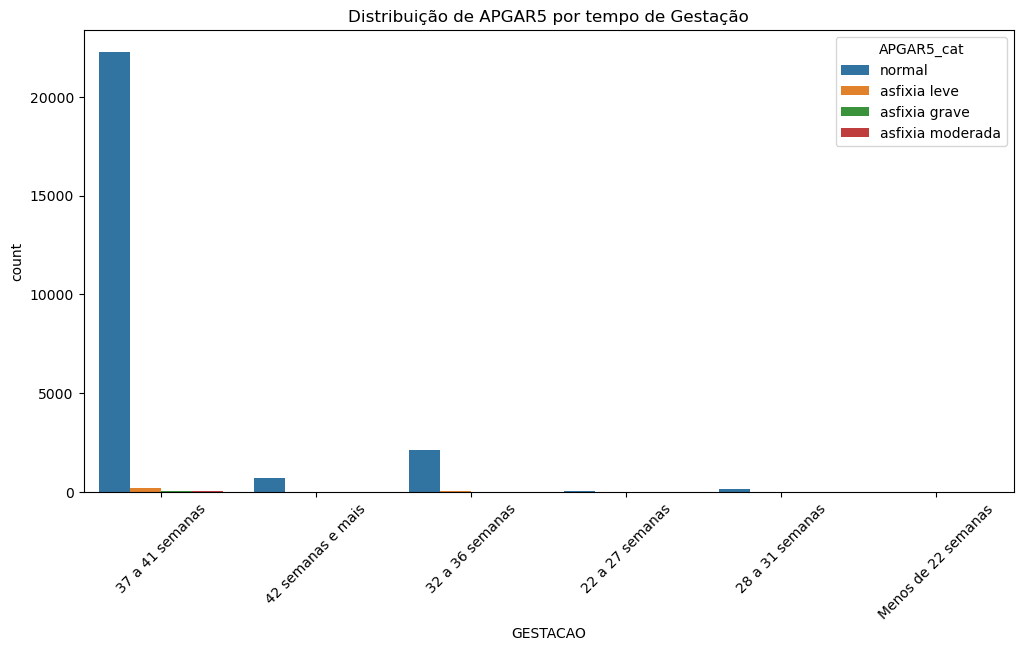

In [51]:
plt.figure(figsize=(12,6))

sns.countplot(
    data=df,
    x='GESTACAO',
    hue='APGAR5_cat',
)

plt.xticks(rotation=45)
plt.title('Distribuição de APGAR5 por tempo de Gestação')
plt.show()


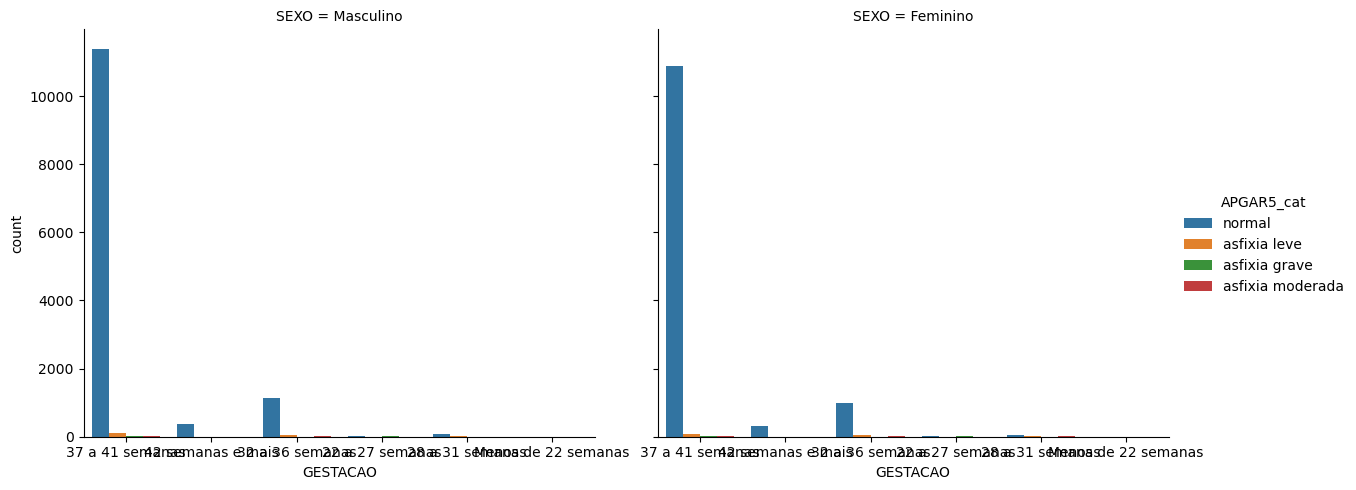

In [53]:
sns.catplot(
    data=df,
    x='GESTACAO',
    hue='APGAR5_cat',
    col='SEXO',
    kind='count',
    height=5,
    aspect=1.2
)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [55]:
tabela = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])
tabela

APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [57]:
tabela_percentual = tabela.div(tabela.sum(axis=1), axis=0) * 100
tabela_percentual.round(2)

# axis=1 → soma por linha

# div(..., axis=0) → divide cada valor pela soma da própria linha

# Multiplicamos por 100 para virar percentual

APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,24.71,14.12,1.18,60.00
28 a 31 semanas,1.85,11.11,7.41,79.63
32 a 36 semanas,0.36,3.27,0.85,95.52
37 a 41 semanas,0.15,0.87,0.12,98.86
42 semanas e mais,0.14,0.86,0.14,98.85
Menos de 22 semanas,28.57,14.29,0.00,57.14


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

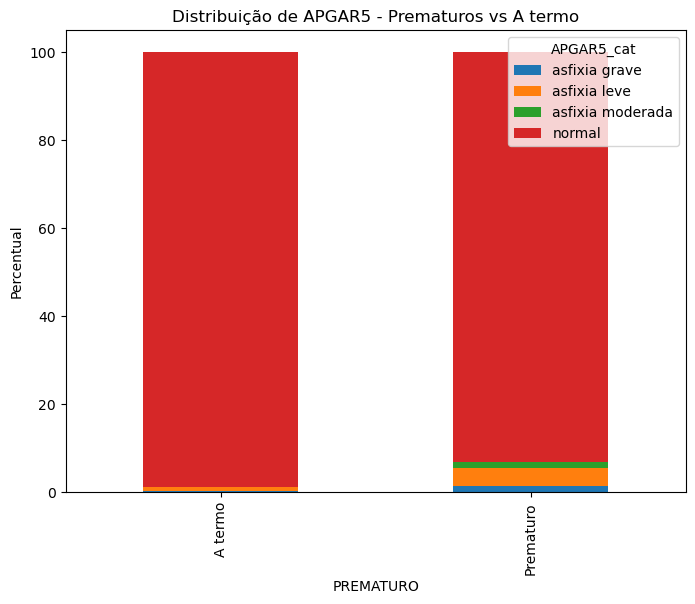

In [73]:
tab_prem = pd.crosstab(df['PREMATURO'], df['APGAR5_cat'])
tab_prem_pct = tab_prem.div(tab_prem.sum(axis=1), axis=0) * 100

tab_prem_pct.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('Distribuição de APGAR5 - Prematuros vs A termo')
plt.ylabel('Percentual')
plt.show()

<Axes: xlabel='PREMATURO'>

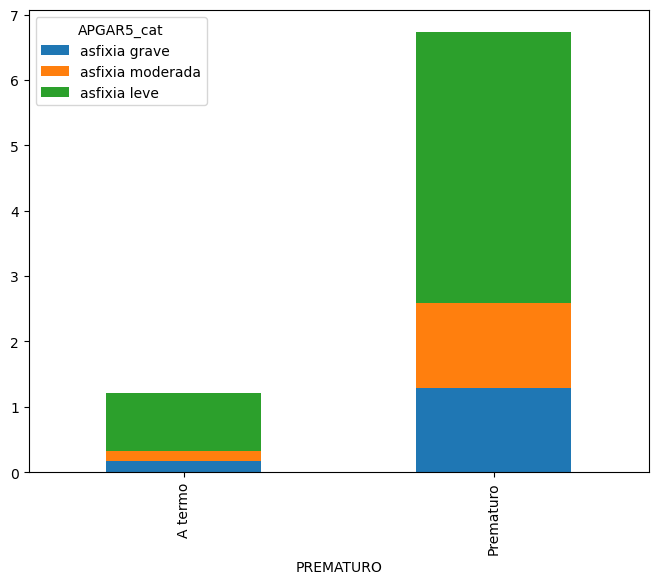

In [75]:
# OBSERVAÇÃO
#Como as barras estão quase 100% vermelhas (normal), a diferença visual fica pequena

tab_prem_pct[['asfixia grave','asfixia moderada','asfixia leve']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,6)
)

In [ ]:
# Observa-se que os nascimentos a termo apresentam praticamente totalidade dos casos classificados como APGAR normal. 
# Já os prematuros, embora também apresentem maioria de classificação normal, possuem proporção relativamente maior de casos de asfixia leve, moderada e grave.
# Dessa forma, conjunto de dados corrobora a afirmação médica de que partos prematuros estão associados a maior risco neonatal, 
# ainda que a maioria dos casos prematuros também apresente desfecho favorável.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

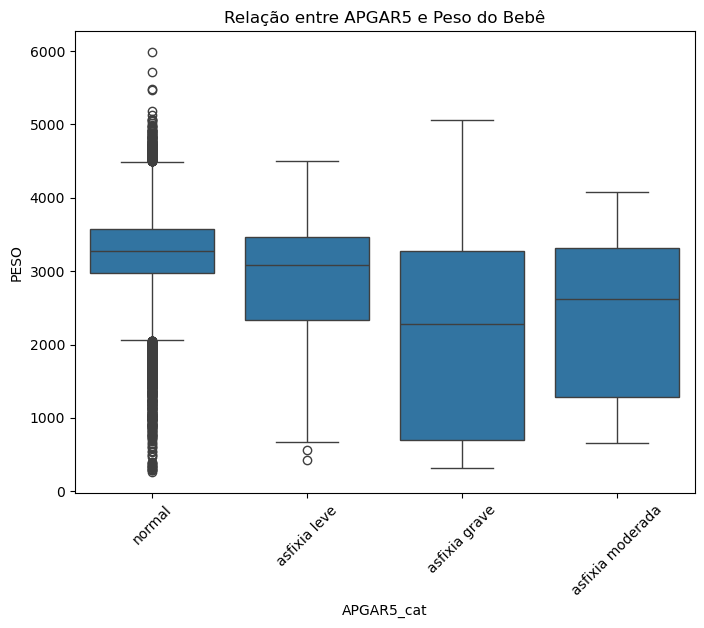

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='APGAR5_cat', y='PESO')
plt.xticks(rotation=45)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.show()

In [79]:
df[['APGAR5', 'PESO']].corr()

,APGAR5,PESO
APGAR5,1.00000,0.16821
PESO,0.16821,1.00000
